In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import cv2
from PIL import Image
from skimage.feature import hog, local_binary_pattern as lbp
from skimage.color import rgb2gray
from skimage import exposure

In [73]:
img = np.asarray(Image.open("../data/preprocessed/images/Alicia_Keys_0001.jpg"))
gray = rgb2gray(img)

In [23]:
? hog

Signature:
 hog(
    image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(3, 3),
    block_norm='L2-Hys',
    visualize=False,
    transform_sqrt=False,
    feature_vector=True,
    multichannel=None,
    *,
    channel_axis=None,
)
Docstring:
Extract Histogram of Oriented Gradients (HOG) for a given image.

Compute a Histogram of Oriented Gradients (HOG) by

    1. (optional) global image normalization
    2. computing the gradient image in `row` and `col`
    3. computing gradient histograms
    4. normalizing across blocks
    5. flattening into a feature vector

Parameters
----------
image : (M, N[, C]) ndarray
    Input image.
orientations : int, optional
    Number of orientation bins.
pixels_per_cell : 2-tuple (int, int), optional
    Size (in pixels) of a cell.
cells_per_block : 2-tuple (int, int), optional
    Number of cells in each block.
block_norm : str {'L1', 'L1-sqrt', 'L2', 'L2-Hys'}, optional
    Block normalization method:

    ``L1``
       Nor

In [161]:
r=3
lbp_img = lbp(
    gray,
    P=1*r,
    R=r
)

In [162]:
out, hog_img = hog(
    gray,
    feature_vector=True,
    visualize=True,
    pixels_per_cell=(10,10),
    cells_per_block=(1,1),
    block_norm="L1",
    orientations=5,
)

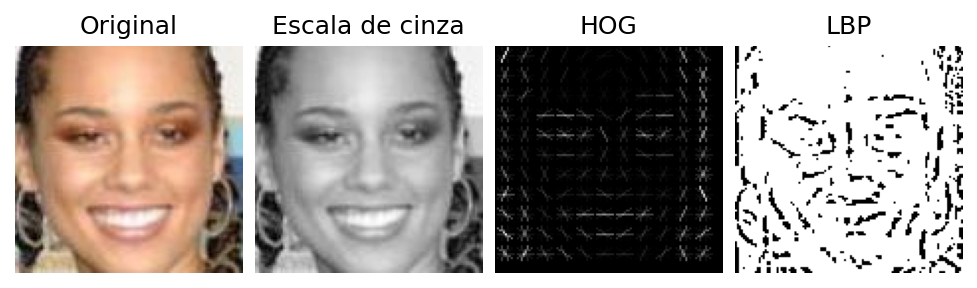

In [163]:
fig, ax = plt.subplots(1, 4, dpi=150, constrained_layout=True)
ax[0].imshow(np.asarray(img))
ax[1].imshow(np.asarray(gray), cmap='gray')
ax[2].imshow(exposure.rescale_intensity(hog_img, in_range=(0, 1)), cmap='gray')
ax[3].imshow(exposure.rescale_intensity(lbp_img, in_range=(0, 1)), cmap='gray')
ax[0].axis(False)
ax[1].axis(False)
ax[2].axis(False)
ax[3].axis(False)

ax[0].set_title("Original")
ax[1].set_title("Escala de cinza")
ax[2].set_title("HOG")
ax[3].set_title("LBP")
plt.show()